## Préparation et Analyse des données

### ETAPE 1 : Collecte des Donnees

BIbliotheques

In [138]:
import pandas as pd
import numpy as np 
import requests  
import os
import json
import matplotlib.pyplot as plt
import matplotlib.figure
%matplotlib inline

Fichier 1 :twitter_archive_enhanced.csv  
* Mode de telechargement : deja acquis

In [10]:
df_00 = pd.read_csv('twitter-archive-enhanced.csv') 

In [3]:
df_00.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Fichier 2 : image_predictions.tsv
* Mode telechargement : par programme

In [4]:
nom_du_répertoire = "IMP"
if not os.path.exists(nom_du_répertoire) :
    os.makedirs(nom_du_répertoire)

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [ ]:
with open(os.path.join(nom_du_répertoire, url.split('/')[-1]), mode = 'wb') as file :
    file.write(response.content)

In [11]:
# lecture 
df_01 = pd.read_csv('IMP\image-predictions.tsv',sep='\t')

In [7]:
df_01.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Fichier 3 : tweet-json.txt
* Mode de telechargement : tweepy
* NB : J'ai directement utilisé les fichiers de udacity car j'arrive pas à avoir un compte de developpeur 

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_00.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [12]:
# Lecture du fichier tweet-json.txt
df_list = []
with open('tweet-json.txt', encoding='utf-8') as file:
    lines = file.readlines()
    for L in lines:
        tweet = json.loads(L)
        df_list.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'],
                        'favorite_count': tweet['favorite_count']})
    
df_02 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [9]:
df_02.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### ETAPE 2 : Acces aux Donnees

1 Evaluation visuelle:

In [10]:
# affiahage des archives twitter
df_00

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Probleme sur le fichier des archives 
* Supprimer les retweets
* La source est sous format de balise
* On a un lien sur les lignes de la colonne texte

In [11]:
# Affichage des prediction de l'image tweet
df_01

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Probleme sur le fichier des prediction d'image
- la colonne img_num n'est pas assez significative pour notre analyse

In [12]:
# Affichage des donnees supplementaires 
df_02

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


2 Evaluation Programmatique

In [13]:
df_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- On peut se passer des colonnes in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id ,retweeted_status_user_id et retweeted_status_timestamp car ils ne fournissent pas assez d'information pour notre analyse  

- Sur la colonne expanded_urls on retrouve des urls identiques separes par une virgule

- Lignes vides sur expanded_urls

In [14]:
df_00.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

- Certains denominateurs sont differents de 10

In [17]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- le nombre de tweets est inferieure a celui des archives

In [16]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Problémes
#### 1-Qualité :
  Archives Twitter
* Supprimer les retweets
* La source est sous format de balise
* On a un lien sur les lignes de la colonne texte
* colonnes in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id ,retweeted_status_user_id et retweeted_status_timestamp a supprimer car ils ne fournissent pas assez d'information pour notre analyse 
* Sur la colonne expanded_urls on retrouve des urls identiques separes par une virgule
* des denominateurs qui sont differents de 10
* Lignes vides sur expanded_urls
* Supprimer les tweets sans jpg_url(apres la fusion des dataframes)

 Prediction D'image
* Supprimer la colonne img_num qui n'est pas assez pertinente pour notre analyse
#### 2-Rangement:
 Archives twitter 
* Les stades des chiens peuvent etre regroupes en une seule colonne dog_stage 

 Prediction d'image
* les colonnes peuvent etre ajouté au dataframe de l'archive

 Tweet_json
* les colonnes peuvent etre ajouté au dataframe de l'archive


### ETAPE 3 : Données de nettoyage

In [61]:
# Copie des donnees originales 
archive = df_00.copy()
images = df_01.copy()
tweetAPI = df_02.copy()

In [62]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Qualité
Nettoyage sur les Archives Twitter

Definition
- Supprimer les retweets

Code

In [63]:
archive = archive[archive['retweeted_status_id'].isnull()] 

Test

In [64]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

Definition
- Extraire la source de la balise html

Code

In [65]:
archive.source = archive.source.str.extract('>([\w\W\s]*)<', expand=True)

Test

In [66]:
archive.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

Definition 
- Enlever les liens sur la colonne texte

Code

In [67]:
 # Fonction qui parcour le texte pour rechercher le lien et l'enlever
def rmv(x):
        http = x.find("http")
        if http == -1:
            x = x
        else:
            x = x[:http - 1]
        return x
    
archive.text = archive.text.apply(rmv)

Test

In [68]:
archive.text.unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet'],
      dtype=object)

Definition
- Supprimer les colonnes in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id ,retweeted_status_user_id et retweeted_status_timestamp

Code

In [69]:
archive = archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id' ,'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

Test

In [70]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


Definition
- Supprimer sur la colonne expanded_urls les urls identiques separes par une virgule

Code

In [71]:
archive['expanded_urls'] = archive.expanded_urls.str.split(',').str[0]

Test

In [72]:
archive.expanded_urls.str.contains(',').sum()

0

Definition
- Supprimer les notes dont les denominateurs sont differents de 10 pour une analyse uniforme

Code

In [73]:
archive = archive.query('rating_denominator == 10')

Test

In [74]:
archive.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

Definition
- Suppriner les lignes vides sur expanded_urls

Code

In [82]:
archive = archive[archive.expanded_urls.notnull()]

Test

In [83]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2099 non-null   int64 
 1   timestamp           2099 non-null   object
 2   source              2099 non-null   object
 3   text                2099 non-null   object
 4   expanded_urls       2099 non-null   object
 5   rating_numerator    2099 non-null   int64 
 6   rating_denominator  2099 non-null   int64 
 7   name                2099 non-null   object
 8   doggo               2099 non-null   object
 9   floofer             2099 non-null   object
 10  pupper              2099 non-null   object
 11  puppo               2099 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.2+ KB


Nettoye des predictions d'image

Definition
- Supprimer la colonne img_num puisqu'on a une image pour chaque tweet 

Code

In [84]:
images.drop('img_num',axis=1,inplace=True)

Test

In [85]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


#### Rangement

Nettoyage sur les archives twitter

Definition
- Regrouper les stades de chiens sur une seule colonne dog_stage

Code

In [98]:
archive["dog_stage"] = archive.doggo+','+ archive.floofer+','+ archive.pupper +','+ archive.puppo

In [105]:
archive.dog_stage = archive.dog_stage.str.replace('None,',"")
archive.dog_stage = archive.dog_stage.str.replace(',None',"")

Test

In [106]:
archive.dog_stage.value_counts()

None             1761
pupper            222
doggo              72
puppo              23
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [108]:
# et on supprime les etapes initiales
archive.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [109]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2099 non-null   int64 
 1   timestamp           2099 non-null   object
 2   source              2099 non-null   object
 3   text                2099 non-null   object
 4   expanded_urls       2099 non-null   object
 5   rating_numerator    2099 non-null   int64 
 6   rating_denominator  2099 non-null   int64 
 7   name                2099 non-null   object
 8   dog_stage           2099 non-null   object
dtypes: int64(3), object(6)
memory usage: 228.5+ KB


Definition

- Ajout des colones du dataframe images dans le dataframe archive

Code

In [118]:
archive = archive.merge(images, how="left", left_on="tweet_id", right_on="tweet_id")

Test

In [121]:
archive.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Definition
- Ajout des colones du dataframe tweetAPI dans le dataframe archive

Code

In [122]:
archive = archive.merge(tweetAPI, how="left", left_on="tweet_id", right_on="tweet_id")

Test

In [124]:
archive.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819


Definition 
- Supprimer les tweets sans jpg_url car il ne contiennent pas d'image

Code

In [125]:
archive = archive[archive.jpg_url.notnull()]

Test

In [127]:
archive.jpg_url.isnull().sum()

0

In [129]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2098
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1976 non-null   int64  
 1   timestamp           1976 non-null   object 
 2   source              1976 non-null   object 
 3   text                1976 non-null   object 
 4   expanded_urls       1976 non-null   object 
 5   rating_numerator    1976 non-null   int64  
 6   rating_denominator  1976 non-null   int64  
 7   name                1976 non-null   object 
 8   dog_stage           1976 non-null   object 
 9   jpg_url             1976 non-null   object 
 10  p1                  1976 non-null   object 
 11  p1_conf             1976 non-null   float64
 12  p1_dog              1976 non-null   object 
 13  p2                  1976 non-null   object 
 14  p2_conf             1976 non-null   float64
 15  p2_dog              1976 non-null   object 
 16  p3    

### ETAPE 4 : Stockage

In [130]:
archive.to_csv('twitter_archive_master.csv', index=False) 

### ETAPE 5 : Analyse et visualisation

In [131]:
main_df = archive.copy()

In [132]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2098
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1976 non-null   int64  
 1   timestamp           1976 non-null   object 
 2   source              1976 non-null   object 
 3   text                1976 non-null   object 
 4   expanded_urls       1976 non-null   object 
 5   rating_numerator    1976 non-null   int64  
 6   rating_denominator  1976 non-null   int64  
 7   name                1976 non-null   object 
 8   dog_stage           1976 non-null   object 
 9   jpg_url             1976 non-null   object 
 10  p1                  1976 non-null   object 
 11  p1_conf             1976 non-null   float64
 12  p1_dog              1976 non-null   object 
 13  p2                  1976 non-null   object 
 14  p2_conf             1976 non-null   float64
 15  p2_dog              1976 non-null   object 
 16  p3    

Question 1- Quelle est la source la plus populaire sur notre dataset

In [134]:
main_df.source.value_counts()

Twitter for iPhone    1937
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

*Ce code nous montre clairement que la majorité des tweets de l'archive weratesdog est tirée de Twitter pour Iphone*

Question 2- Quelle sont les stades de chiens les plus frequents

In [137]:
stage = main_df.query('dog_stage != "None"')

In [163]:
stage.dog_stage.value_counts()

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

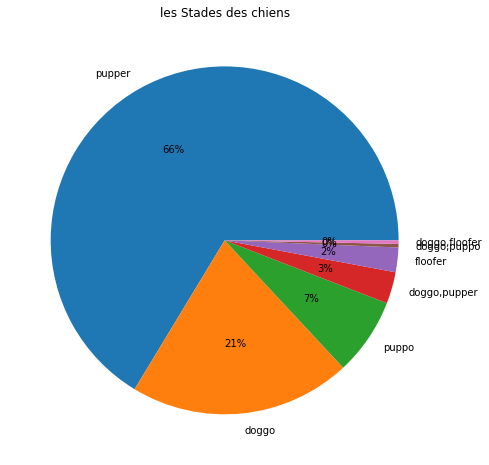

In [173]:
_labels = ['pupper','doggo','puppo','doggo,pupper','floofer','doggo,puppo','doggo,floofer']
_values = stage.dog_stage.value_counts()
fig= plt.figure(figsize=(8, 8))
plt.title("les Stades des chiens")
plt.pie(_values, labels = _labels, shadow=False, autopct='%.0f%%')
plt.show();

*Vue notre graphique il est evident que la plus grande partie des chiens dont on connait leur stade est du type pupper avec un pourcentage de 66 %* 

*On remarque aussi que les chiens avec deux stades sont rares (2 sur 1976)*

Question 3- Quelle type de correlation existe entre le nombre de favoris et le nombre de retweet

<AxesSubplot:title={'center':'Correlation entre Favorite_count et retweet_count'}, xlabel='favorite_count', ylabel='retweet_count'>

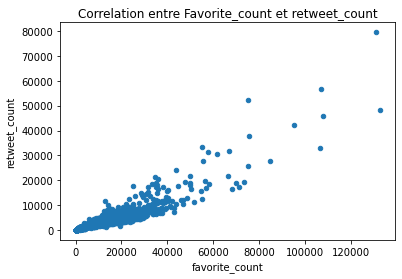

In [175]:
main_df.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Correlation entre Favorite_count et retweet_count')

*Apparemment la correlation entre le nombre de favoris et le nombre de retweets est positive.*

Question 4- Quelle est la meilleure race de chien selon les predictions p1

In [222]:
bb = main_df[main_df.p1_dog == True]
bb = bb.groupby('p1')['p1_conf'].mean()

In [226]:
bb = bb.sort_values(ascending=False)
bb = bb.head(20)

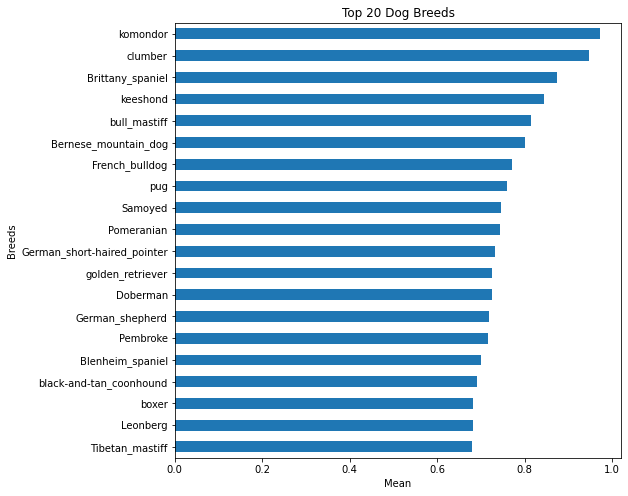

In [229]:
bb.plot(kind="barh", figsize=(8,8));
plt.xlabel("Moyenne")
plt.ylabel("races")
plt.title("Top 20 des races")
plt.gca().invert_yaxis()
plt.show();

*Selon les predictions p1 apres avoir filtre les colonne ou on retrouve des chiens , c'est le Komondor qui est appurue comme meilleure race de chiens*